In [1]:
import pandas as pd;
import numpy as np;
import os;

In [2]:
dfs = {i.split(".")[0]: pd.read_csv(f'data/{i}') for i in os.listdir('./data/')}

In [3]:
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")

In [4]:
print("\n**********\nOrder Items:\n",order_items.head())
print("\n**********\nOrders:\n",orders.head())
print("\n**********\nOrder Payments:\n",order_payments.head())


**********
Order Items:
                            order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:1

In [5]:
#Build working dataframe
#Unique identifier of product is product_id-seller_id pair

#Convert timestamps to datetime
orders['order_purchase_timestamp']=pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at']=pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date']=pd.to_datetime(orders.order_approved_at)
orders['order_delivered_customer_date']=pd.to_datetime(orders.order_delivered_customer_date)
orders['Time_to_customer'] = orders['order_delivered_customer_date']-orders['order_purchase_timestamp']

In [6]:
print(orders['Time_to_customer'])
orders['Time_to_customer']= orders['Time_to_customer'].dt.days

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Name: Time_to_customer, Length: 99441, dtype: timedelta64[ns]


In [7]:
df = orders.merge(order_items, left_on="order_id",right_on="order_id",how="inner").drop(["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","freight_value","shipping_limit_date","order_item_id","order_status"],axis=1)

In [8]:
df['date'] = df["order_purchase_timestamp"].dt.date

In [9]:
df = df.drop(['order_purchase_timestamp'],axis=1)
df

,order_id,customer_id,Time_to_customer,product_id,seller_id,price,date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,2018-02-13
...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,2018-02-06
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,24.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,2017-08-27
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,2018-01-08
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,2018-01-08


In [10]:
sales_quantity = df.groupby(["seller_id","product_id","date"]).count().reset_index()

In [11]:
sales_quantity['quantity'] = sales_quantity['price']
sales_quantity = sales_quantity.drop(["Time_to_customer","customer_id","price","order_id"],axis=1)

In [12]:
sales_quantity

,seller_id,product_id,date,quantity
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,2017-09-26,1
1,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-12,1
2,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-18,1
3,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,2017-03-15,2
4,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,2017-03-25,1
...,...,...,...,...
94619,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2017-01-16,1
94620,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2017-01-19,1
94621,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,2016-10-10,1
94622,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,2017-04-03,1


In [13]:
sales = df.merge(sales_quantity, left_on=["seller_id","product_id","date"],right_on=["seller_id","product_id","date"],how="inner")

In [14]:
sales = sales.drop_duplicates()
sales

,order_id,customer_id,Time_to_customer,product_id,seller_id,price,date,quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,2017-10-02,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,2018-07-24,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,2018-08-08,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,2017-11-18,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,2018-02-13,1
...,...,...,...,...,...,...,...,...
112645,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,11.0,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,139.90,2017-02-23,1
112646,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,72.00,2017-03-09,1
112647,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,2018-02-06,1
112648,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,24.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,2017-08-27,1


In [15]:
#Threshold of at least 10 weeks of occurences. 
sales["Year"] = pd.to_datetime(sales['date']).dt.year
sales["Week_Num"] = pd.to_datetime(sales['date']).dt.week
sales["Year-Week"] = sales["Year"].astype(str)+"-"+sales["Week_Num"].astype(str)

/home/tbenthomas/Documents/baproj/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
print(sorted(sales["Year"].unique()),"\n")
print(sorted(sales["Week_Num"].unique()))
sales

[2016, 2017, 2018] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


,order_id,customer_id,Time_to_customer,product_id,seller_id,price,date,quantity,Year,Week_Num,Year-Week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,2017-10-02,1,2017,40,2017-40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,2018-07-24,1,2018,30,2018-30
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,2018-08-08,1,2018,32,2018-32
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,2017-11-18,1,2017,46,2017-46
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,2018-02-13,1,2018,7,2018-7
...,...,...,...,...,...,...,...,...,...,...,...
112645,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,11.0,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,139.90,2017-02-23,1,2017,8,2017-8
112646,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,72.00,2017-03-09,1,2017,10,2017-10
112647,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,2018-02-06,1,2018,6,2018-6
112648,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,24.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,2017-08-27,1,2017,34,2017-34


In [17]:
yw_table = sales[['product_id','seller_id','Year-Week']].drop_duplicates()

In [18]:
yw_table['count'] = 0
occurences = yw_table.groupby(['product_id','seller_id']).count().reset_index().drop(['Year-Week'],axis=1)
occurences[occurences['count']>=8].drop_duplicates()

,product_id,seller_id,count
9,001b72dfd63e9833e8c02742adf472e3,8a32e327fe2c1b3511609d81aaf9f042,10
12,002159fe700ed3521f46cfcf6e941c76,048c2757535328e0d7dac690ad3c0aae,8
38,005030ef108f58b46b78116f754d8d38,3c7c4a49ec3c6550809089c6a2ca9370,10
58,008cff0e5792219fae03e570f980b330,530ec6109d11eaaf87999465c6afee01,16
77,00ba6d766f0b1d7b78a5ce3e1e033263,53e4c6e0f4312d4d2107a8c9cddf45cd,10
...,...,...,...
34306,ff29d8cb1cd0cd5ea37b80dac9939e1c,8b321bb669392f5163d04c59e235e066,14
34329,ff55834c0b3272853dfe62340f2bb91b,6560211a19b47992c3666cc44a7e94c0,8
34353,ff7fccf8513f360157f0660fe51d1d88,440dd6ab244315c632130ecfb63827b1,11
34412,ffc9caf33e2d1e9f44e3e06da19085f7,b18dc380845b24038cfc48006478f099,9


In [19]:
occurences =occurences[occurences['count']>=8]
sales = sales.merge(occurences, left_on=["product_id","seller_id"],right_on=["product_id","seller_id"],how="inner").drop(["count"],axis=1)

### Final Sales dataset containing items that have 8 or more weeks of occurences in the dataset

In [20]:
sales

,order_id,customer_id,Time_to_customer,product_id,seller_id,price,date,quantity,Year,Week_Num,Year-Week
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-24,1,2018,30,2018-30
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-09,1,2018,32,2018-32
2,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-12,2,2018,32,2018-32
3,c54125146b0e42fbe85ada6802c51f30,eb1992e3905f9f9085b031e36b98e4dc,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-12,2,2018,32,2018-32
4,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-09,1,2018,28,2018-28
...,...,...,...,...,...,...,...,...,...,...,...
39899,8af5834451865606adcc31b165d6ae54,2a6179cf815c302b5b94a2bab0af39d4,10.0,00faa46f36261af8bbf3a4d37fa4841b,b372ee768ed69e46ca8cdbd267aa7a38,270.0,2018-02-06,1,2018,6,2018-6
39900,082c30f193b1a499078fafbfa3a2d6a7,1b9b09dd0c719b512590f46d37e8cc97,13.0,00faa46f36261af8bbf3a4d37fa4841b,b372ee768ed69e46ca8cdbd267aa7a38,270.0,2017-11-13,1,2017,46,2017-46
39901,af6dbf659dbbf1932943adf2a2f6da6b,ee7c4ced04927410df4a3977fbe5e229,13.0,00faa46f36261af8bbf3a4d37fa4841b,b372ee768ed69e46ca8cdbd267aa7a38,270.0,2017-12-05,1,2017,49,2017-49
39902,d92197e1617b69200451debc2626c333,a45ca5e6fc32bfa5bfae981107d3ef27,24.0,00faa46f36261af8bbf3a4d37fa4841b,b372ee768ed69e46ca8cdbd267aa7a38,295.0,2018-05-19,1,2018,20,2018-20


## Price Analysis
### Find items whose price changed at least three times

In [21]:
sales_prices = sales[['product_id','seller_id','price']].drop_duplicates()

In [22]:
sales_mult_prices = sales_prices.groupby(['product_id','seller_id']).count()

In [23]:
items_mult_prices = sales_mult_prices[sales_mult_prices['price']>=3].reset_index().drop(['price'],axis=1)

In [24]:
sales = sales.merge(items_mult_prices,left_on=["product_id","seller_id"],right_on=["product_id","seller_id"],how="inner")

## Final dataset containing only items with 8 or more weeks of occurrences and three or more unique prices

In [25]:
sales

,order_id,customer_id,Time_to_customer,product_id,seller_id,price,date,quantity,Year,Week_Num,Year-Week
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-24,1,2018,30,2018-30
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-09,1,2018,32,2018-32
2,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-12,2,2018,32,2018-32
3,c54125146b0e42fbe85ada6802c51f30,eb1992e3905f9f9085b031e36b98e4dc,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-12,2,2018,32,2018-32
4,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-09,1,2018,28,2018-28
...,...,...,...,...,...,...,...,...,...,...,...
20572,23bb9807759656cf1a127051f168d6bd,1023dede418d95202d1fe335005e1844,16.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,144.9,2017-12-02,1,2017,48,2017-48
20573,1c3f5d77360bb33e56ac9ab123e07d6d,69ed38d3310866ac3a86f4327cbc8d86,11.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,129.9,2017-05-31,1,2017,22,2017-22
20574,1972a123466d40a62224630f7d0de530,0f41a66a477328c778e98eacb6a6867b,11.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,129.9,2017-02-06,1,2017,6,2017-6
20575,e475e7ce217d2a677451521dce3d35d2,bba9e2a97db97c59188ff59562b430a4,22.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,144.9,2017-11-26,2,2017,47,2017-47


## Merge other datasets to final products list

In [26]:
#merge to customers
customers = pd.read_csv('data/olist_customers_dataset.csv').drop(["customer_unique_id"],axis=1)
sales= sales.merge(customers,left_on="customer_id",right_on="customer_id",how="inner")

In [27]:
sales

,order_id,customer_id,Time_to_customer,product_id,seller_id,price,date,quantity,Year,Week_Num,Year-Week,customer_zip_code_prefix,customer_city,customer_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-24,1,2018,30,2018-30,47813,barreiras,BA
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-09,1,2018,32,2018-32,14500,ituverava,SP
2,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-12,2,2018,32,2018-32,35680,itauna,MG
3,c54125146b0e42fbe85ada6802c51f30,eb1992e3905f9f9085b031e36b98e4dc,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-12,2,2018,32,2018-32,83707,araucaria,PR
4,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-09,1,2018,28,2018-28,33820,ribeirao das neves,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20572,23bb9807759656cf1a127051f168d6bd,1023dede418d95202d1fe335005e1844,16.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,144.9,2017-12-02,1,2017,48,2017-48,15600,fernandopolis,SP
20573,1c3f5d77360bb33e56ac9ab123e07d6d,69ed38d3310866ac3a86f4327cbc8d86,11.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,129.9,2017-05-31,1,2017,22,2017-22,12225,sao jose dos campos,SP
20574,1972a123466d40a62224630f7d0de530,0f41a66a477328c778e98eacb6a6867b,11.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,129.9,2017-02-06,1,2017,6,2017-6,69054,manaus,AM
20575,e475e7ce217d2a677451521dce3d35d2,bba9e2a97db97c59188ff59562b430a4,22.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,144.9,2017-11-26,2,2017,47,2017-47,29709,colatina,ES


In [28]:
#merge to geolocations
geolocations = pd.read_csv("data/olist_geolocation_dataset.csv")
sales= sales.merge(customers,left_on="customer_zip_code_prefix",right_on="customer_zip_code_prefix",how="inner")
sales

,order_id,customer_id_x,Time_to_customer,product_id,seller_id,price,date,quantity,Year,Week_Num,Year-Week,customer_zip_code_prefix,customer_city_x,customer_state_x,customer_id_y,customer_city_y,customer_state_y
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,2018-07-24,1,2018,30,2018-30,47813,barreiras,BA,2fd14b072ea7ff170527396ceca430d0,barreiras,BA
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,2018-07-24,1,2018,30,2018-30,47813,barreiras,BA,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
2,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,2018-08-09,1,2018,32,2018-32,14500,ituverava,SP,171233b55272542bfb1e4d1dab2569bb,ituverava,SP
3,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,2018-08-09,1,2018,32,2018-32,14500,ituverava,SP,95a001f306dfba60026ad846f37ab045,ituverava,SP
4,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,2018-08-09,1,2018,32,2018-32,14500,ituverava,SP,abad8dba5de22702ed59246b0f2455b7,ituverava,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350939,d6758be9876c16ad5edf45b268d91626,b3c6494de5baef8c18808390603352e4,1.0,c695342500b74ff952db47b541726de1,1eade46fba20122dc4aefb379f8c636b,16.99,2018-07-18,2,2018,29,2018-29,8675,suzano,SP,3e90b5882ce0e665b837de00a2a8625c,suzano,SP
350940,5cdfba01ba3c4b8c6b31ac8573b2432f,eee89f96e3c018d7fcb143f8916e60eb,1.0,c695342500b74ff952db47b541726de1,1eade46fba20122dc4aefb379f8c636b,13.99,2018-06-20,2,2018,25,2018-25,3535,sao paulo,SP,eee89f96e3c018d7fcb143f8916e60eb,sao paulo,SP
350941,5cdfba01ba3c4b8c6b31ac8573b2432f,eee89f96e3c018d7fcb143f8916e60eb,1.0,c695342500b74ff952db47b541726de1,1eade46fba20122dc4aefb379f8c636b,13.99,2018-06-20,2,2018,25,2018-25,3535,sao paulo,SP,12388b49e68e75381131ee52c3b990de,sao paulo,SP
350942,b1d045cd447d2961b72e0d67c18f5d94,aed3f1f445a4ea906938e139249662a9,19.0,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,129.90,2017-06-06,1,2017,23,2017-23,4820,sao paulo,SP,8000fc09440cd5334baf5bf5d5ebdcb3,sao paulo,SP


In [29]:
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
reviews['review_date'] = pd.to_datetime(reviews["review_creation_date"])
reviews['review_date'] = reviews.review_date.dt.date
reviews = reviews.drop(['review_creation_date'],axis=1)
reviews
#Reviews seem to be for an order rather than an individual product. Therefore I won't use

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp,review_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 21:46:59,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-11 03:05:13,2018-03-10
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-18 14:36:24,2018-02-17
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53,2018-03-01
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-11 20:06:42,2017-12-09
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-23 09:10:43,2018-03-22
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-02 12:59:13,2018-07-01
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-16 01:29:43,2017-12-15


In [30]:
products = pd.read_csv("data/olist_products_dataset.csv")
category_translation = pd.read_csv("data/product_category_name_translation.csv")
category_translation.columns=['spanish','category']
products = products.merge(category_translation,left_on="product_category_name",right_on="spanish",how="inner").drop(['spanish','product_category_name'],axis=1)
products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [31]:
sales= sales.merge(products,left_on="product_id",right_on="product_id",how="inner")

In [32]:
sales

,order_id,customer_id_x,Time_to_customer,product_id,seller_id,price,date,quantity,Year,Week_Num,...,customer_city_y,customer_state_y,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-24,1,2018,30,...,barreiras,BA,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,2018-07-24,1,2018,30,...,barreiras,BA,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-09,1,2018,32,...,ituverava,SP,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
3,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-09,1,2018,32,...,ituverava,SP,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,5.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,2018-08-09,1,2018,32,...,ituverava,SP,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,94d427c43b021e3554c0aae6436b57e9,ae158bb7f980ce5561ffbecd33920c1b,6.0,78119fbfa709d07b86f5ccf15043c6d6,4869f7a5dfa277a7dca6462dcf3b52b2,187.0,2018-06-09,1,2018,23,...,sao paulo,SP,43.0,447.0,2.0,586.0,18.0,11.0,13.0,cool_stuff
350264,94d427c43b021e3554c0aae6436b57e9,ae158bb7f980ce5561ffbecd33920c1b,6.0,78119fbfa709d07b86f5ccf15043c6d6,4869f7a5dfa277a7dca6462dcf3b52b2,187.0,2018-06-09,1,2018,23,...,sao paulo,SP,43.0,447.0,2.0,586.0,18.0,11.0,13.0,cool_stuff
350265,94d427c43b021e3554c0aae6436b57e9,ae158bb7f980ce5561ffbecd33920c1b,6.0,78119fbfa709d07b86f5ccf15043c6d6,4869f7a5dfa277a7dca6462dcf3b52b2,187.0,2018-06-09,1,2018,23,...,sao paulo,SP,43.0,447.0,2.0,586.0,18.0,11.0,13.0,cool_stuff
350266,5f351b2d110b39ec4b884f67ee59712e,806506dfe3d2254fc15ce9d6fe1d6c05,8.0,78119fbfa709d07b86f5ccf15043c6d6,4869f7a5dfa277a7dca6462dcf3b52b2,188.0,2018-05-10,1,2018,19,...,virgolandia,MG,43.0,447.0,2.0,586.0,18.0,11.0,13.0,cool_stuff


In [33]:
sales.columns

Index(['order_id', 'customer_id_x', 'Time_to_customer', 'product_id',
       'seller_id', 'price', 'date', 'quantity', 'Year', 'Week_Num',
       'Year-Week', 'customer_zip_code_prefix', 'customer_city_x',
       'customer_state_x', 'customer_id_y', 'customer_city_y',
       'customer_state_y', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'category'],
      dtype='object')

In [34]:
sales = sales.drop(['order_id','customer_id_x','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],axis=1)

In [47]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

sales

,Time_to_customer,price,quantity,Year,Week_Num,month,agro_industry_and_commerce,air_conditioning,art,audio,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,13.0,118.7,1,2018,30,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.0,118.7,1,2018,30,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,116.9,1,2018,32,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.0,116.9,1,2018,32,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,116.9,1,2018,32,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,6.0,187.0,1,2018,23,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
350264,6.0,187.0,1,2018,23,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
350265,6.0,187.0,1,2018,23,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
350266,8.0,188.0,1,2018,19,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
sales['day'] =pd.to_datetime(sales['date']).dt.day_name()
sales['month'] = pd.to_datetime(sales['date']).dt.month
sales = sales.drop(['product_id','seller_id','date','customer_id_y','Year-Week'],axis=1)
sales

,Time_to_customer,price,quantity,Year,Week_Num,customer_zip_code_prefix,customer_city_x,customer_state_x,customer_city_y,customer_state_y,category,day,month
0,13.0,118.7,1,2018,30,47813,barreiras,BA,barreiras,BA,perfumery,Tuesday,7
1,13.0,118.7,1,2018,30,47813,barreiras,BA,barreiras,BA,perfumery,Tuesday,7
2,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,perfumery,Thursday,8
3,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,perfumery,Thursday,8
4,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,perfumery,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,cool_stuff,Saturday,6
350264,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,cool_stuff,Saturday,6
350265,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,cool_stuff,Saturday,6
350266,8.0,188.0,1,2018,19,39715,virgolandia,MG,virgolandia,MG,cool_stuff,Thursday,5


In [37]:
sales.groupby('category').count()

,Time_to_customer,price,quantity,Year,Week_Num,customer_zip_code_prefix,customer_city_x,customer_state_x,customer_city_y,customer_state_y,day,month
category,,,,,,,,,,,,
agro_industry_and_commerce,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106
air_conditioning,91,91,91,91,91,91,91,91,91,91,91,91
art,1571,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576
audio,2003,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
auto,5970,6018,6018,6018,6018,6018,6018,6018,6018,6018,6018,6018
baby,8002,8115,8115,8115,8115,8115,8115,8115,8115,8115,8115,8115
bed_bath_table,42409,42912,42912,42912,42912,42912,42912,42912,42912,42912,42912,42912
computers,410,412,412,412,412,412,412,412,412,412,412,412
computers_accessories,27604,28105,28105,28105,28105,28105,28105,28105,28105,28105,28105,28105


In [38]:
sales = pd.concat([sales,pd.get_dummies(sales['category'])],axis=1)
sales

,Time_to_customer,price,quantity,Year,Week_Num,customer_zip_code_prefix,customer_city_x,customer_state_x,customer_city_y,customer_state_y,...,perfumery,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,telephony,toys,watches_gifts
0,13.0,118.7,1,2018,30,47813,barreiras,BA,barreiras,BA,...,1,0,0,0,0,0,0,0,0,0
1,13.0,118.7,1,2018,30,47813,barreiras,BA,barreiras,BA,...,1,0,0,0,0,0,0,0,0,0
2,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,...,1,0,0,0,0,0,0,0,0,0
3,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,...,1,0,0,0,0,0,0,0,0,0
4,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,...,0,0,0,0,0,0,0,0,0,0
350264,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,...,0,0,0,0,0,0,0,0,0,0
350265,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,...,0,0,0,0,0,0,0,0,0,0
350266,8.0,188.0,1,2018,19,39715,virgolandia,MG,virgolandia,MG,...,0,0,0,0,0,0,0,0,0,0


In [39]:

sales = pd.concat([sales,pd.get_dummies(sales['day'])],axis=1)
sales =sales.drop(['category','day'],axis=1)
sales

,Time_to_customer,price,quantity,Year,Week_Num,customer_zip_code_prefix,customer_city_x,customer_state_x,customer_city_y,customer_state_y,...,telephony,toys,watches_gifts,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,13.0,118.7,1,2018,30,47813,barreiras,BA,barreiras,BA,...,0,0,0,0,0,0,0,0,1,0
1,13.0,118.7,1,2018,30,47813,barreiras,BA,barreiras,BA,...,0,0,0,0,0,0,0,0,1,0
2,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,...,0,0,0,0,0,0,0,1,0,0
3,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,...,0,0,0,0,0,0,0,1,0,0
4,5.0,116.9,1,2018,32,14500,ituverava,SP,ituverava,SP,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,...,0,0,0,0,0,1,0,0,0,0
350264,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,...,0,0,0,0,0,1,0,0,0,0
350265,6.0,187.0,1,2018,23,4940,sao paulo,SP,sao paulo,SP,...,0,0,0,0,0,1,0,0,0,0
350266,8.0,188.0,1,2018,19,39715,virgolandia,MG,virgolandia,MG,...,0,0,0,0,0,0,0,1,0,0


In [40]:
sales = pd.concat([sales,pd.get_dummies(sales['customer_state_x'])],axis=1)
sales =sales.drop(['customer_state_x','customer_zip_code_prefix','customer_city_x','customer_city_y','customer_state_y'],axis=1)
sales.describe()

,Time_to_customer,price,quantity,Year,Week_Num,month,agro_industry_and_commerce,air_conditioning,art,audio,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,345967.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,...,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000,350268.000000
mean,12.736683,109.955560,1.934796,2017.523965,24.647199,6.092092,0.003158,0.000260,0.004499,0.005747,...,0.032726,0.221790,0.001342,0.000731,0.000071,0.046225,0.035199,0.001924,0.374111,0.001039
std,10.026212,106.839584,2.176580,0.501457,14.631946,3.357927,0.056104,0.016116,0.066927,0.075591,...,0.177920,0.415451,0.036606,0.027025,0.008448,0.209971,0.184282,0.043824,0.483893,0.032220
min,0.000000,6.900000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,53.900000,1.000000,2017.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,89.900000,1.000000,2018.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,129.990000,2.000000,2018.000000,36.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,208.000000,1997.000000,25.000000,2018.000000,52.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling/Feature Analysis

### Random Forest (Regression)

In [41]:
sales =sales.dropna()
Y = sales['quantity']
X = sales.drop(['quantity'],axis=1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 101)

In [ ]:
start = time.process_time()
trainedforest = RandomForestRegressor(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)


In [43]:
predictionforest

array([1.        , 1.07714286, 1.        , ..., 1.        , 1.        ,
       2.99285714])

In [46]:
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
import math
print("Explained Variance: ",explained_variance_score(Y_Test,predictionforest))
print("R^2: ",r2_score(Y_Test,predictionforest))

Explained Variance:  0.9860740166810813
R^2:  0.9860740121192315


In [47]:
from matplotlib import pyplot as plt

<AxesSubplot:>

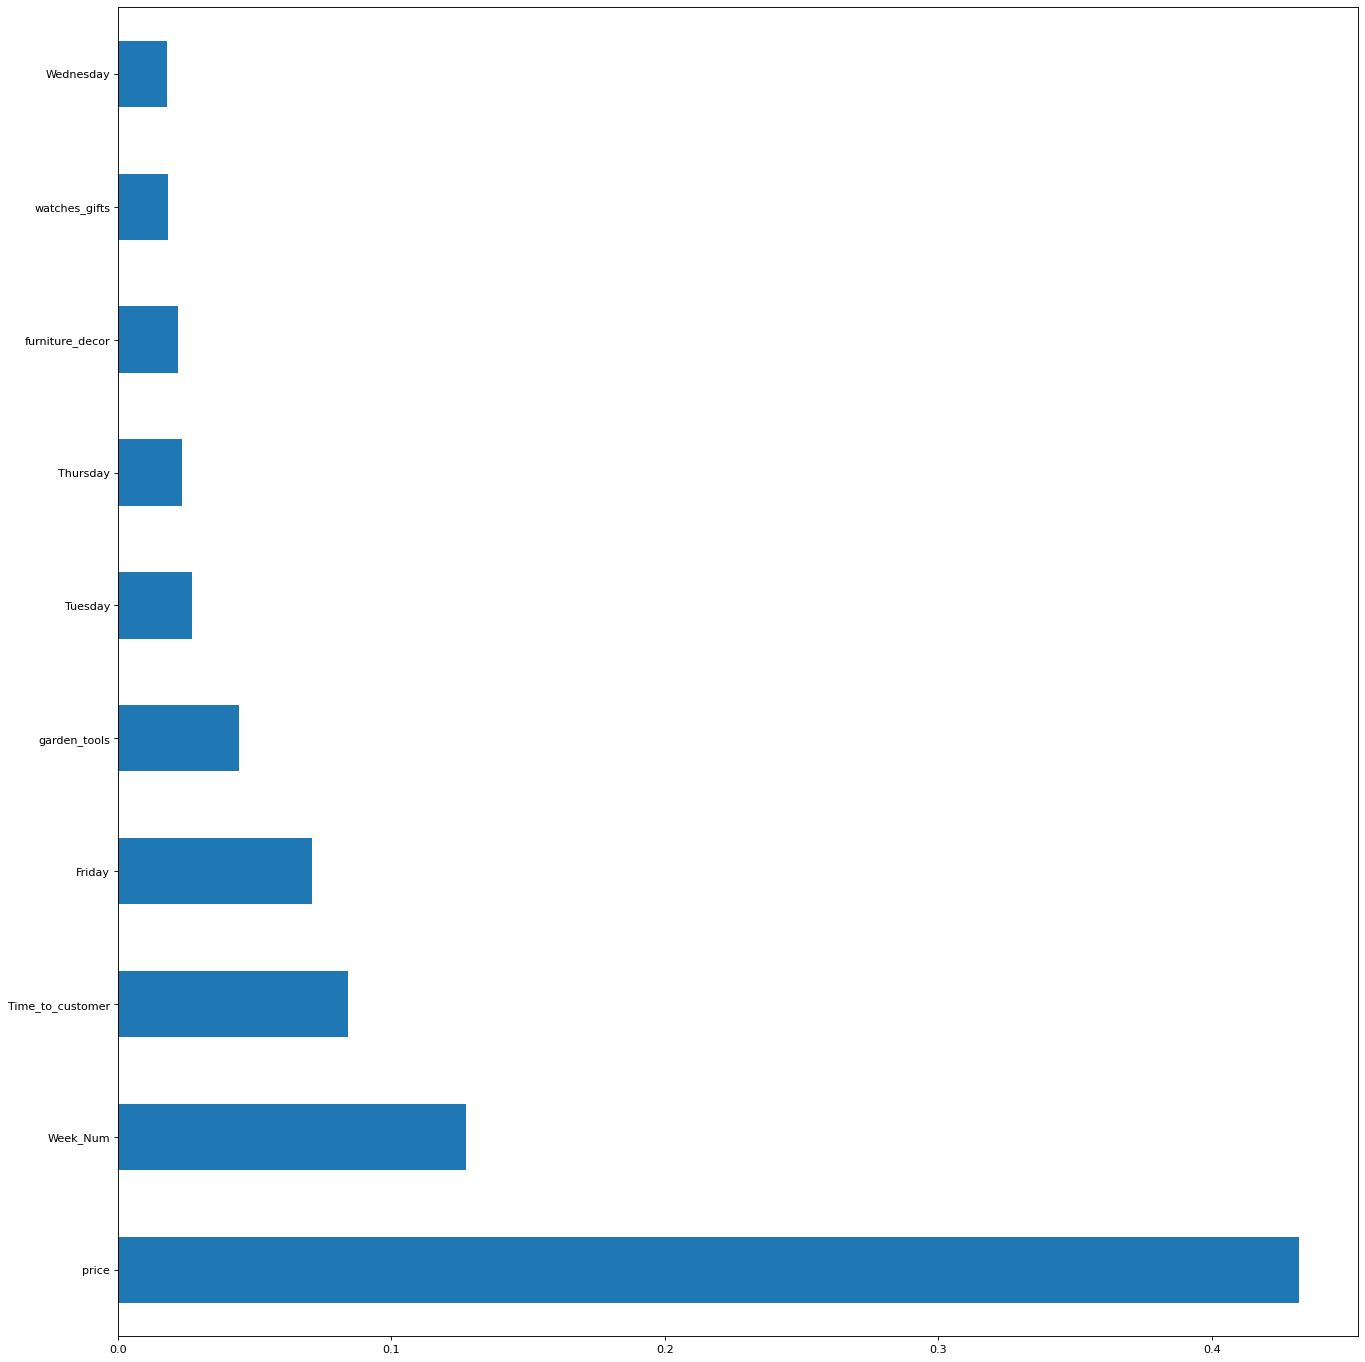

In [51]:
plt.figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [69]:
X_reduced = X[list(feat_importances.nlargest(10).index)]
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_reduced, Y, test_size = 0.30,random_state = 101)

In [71]:
start = time.process_time()
trainedforest = RandomForestRegressor(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest2 = trainedforest.predict(X_Test2)

268.40496583000004


In [73]:
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
import math
print("Explained Variance: ",explained_variance_score(Y_Test2,predictionforest2))
print("R^2: ",r2_score(Y_Test,predictionforest2))

Explained Variance:  0.9559945999585665
R^2:  0.9559942066520283
